<a href="https://colab.research.google.com/github/SafiyaJan/Fuzzy-Control-System-for-Obstacle-Avoidance/blob/master/A4Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Add imports
To build this inference system, we will use the skfuzzy library in Python. If the library is not available on your system, uncomment the first line in the cell below.

In [10]:
# !pip install -U scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

## Step 1 - Create Antecendents and Consequents
- Inference systems require rules to be written in implication form which contain antecendents (which represent inputs) and consequences (which represent outputs).  
- This system entails 2 inputs, Distance (D) and Angle (A) from the obstacle. The universes and fuzzy states for the inputs are defined below:
    - **Distance (D)**
      - Universe: [0,10] defined at a steps of 0.5
      - Fuzzy States: N = Near, F = Far, VF = Very Far
    - **Angle (D)**
      - Universe: [0,90] defined at steps of 1
      - Fuzzy States: S = Small, M = Medium, L = Large

- This system outputs two 2 quantities, Speed (S) and Steering Turn (ST). The universes and fuzzy states for the inputs are defined below:
    - **Speed (S)**
      - Universe: [0,1] defined at steps of 0.2
      - Fuzzy States: SS = Slow Speed, MS = Medium Speed, FS = Fast Speed, MSX = Maximum
Speed
    - **Steering Turn (ST)**
      - Universe: [0,90] defined at steps of 1
      - Fuzzy States: MST = Mild Turn, SST = Sharp Turn, VST = Very Sharp Turn





In [11]:
distance = ctrl.Antecedent(np.arange(0, 10.5, 0.5), 'distance')
angle = ctrl.Antecedent(np.arange(0, 91, 1), 'angle')
speed = ctrl.Consequent(np.arange(0, 5.2, 0.2), 'speed')
steering_turn = ctrl.Consequent(np.arange(0, 91, 1), 'steering_turn')

## Step 2 - Build membership functions for fuzzy sets
We now build the membership functions (MF) for the fuzzy quantities of the system. A combination of triangular and trapezoidal MFs were used. The code block also displays how each MF looks like for each of the fuzzy quanities.

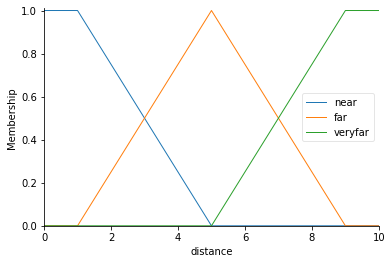

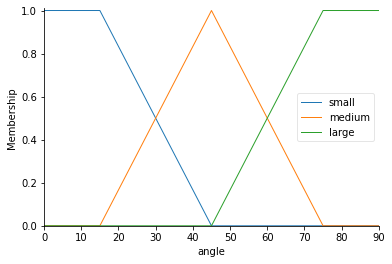

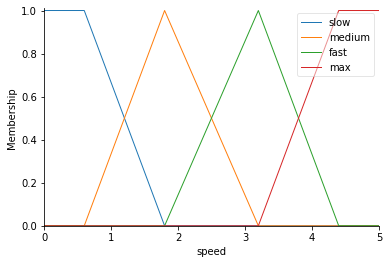

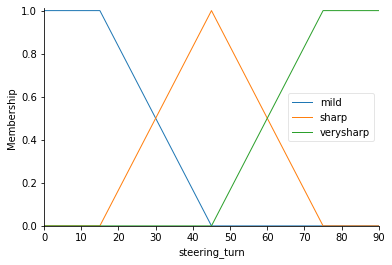

In [12]:
distance ['near'] = fuzz.trapmf(distance.universe, [0, 0, 1, 5])
distance ['far'] = fuzz.trimf(distance.universe, [1, 5, 9])
distance ['veryfar'] = fuzz.trapmf(distance.universe, [5, 9, 10, 10])

angle ['small'] = fuzz.trapmf(angle.universe, [0, 0, 15,45])
angle ['medium'] = fuzz.trimf(angle.universe, [15, 45, 75])
angle ['large'] = fuzz.trapmf(angle.universe, [45, 75, 90,90])

speed ['slow'] = fuzz.trapmf(speed.universe, [0, 0, 0.6 ,1.8])
speed ['medium'] = fuzz.trimf(speed.universe, [0.6, 1.8, 3.2])
speed ['fast'] = fuzz.trimf(speed.universe, [1.8, 3.2, 4.4])
speed ['max'] = fuzz.trapmf(speed.universe, [3.2, 4.4, 5, 5])

steering_turn ['mild'] = fuzz.trapmf(steering_turn.universe, [0, 0, 15,45])
steering_turn ['sharp'] = fuzz.trimf(steering_turn.universe, [15, 45, 75])
steering_turn ['verysharp'] = fuzz.trapmf(steering_turn.universe, [45, 75, 90,90])

distance.view()
angle.view()
speed.view()
steering_turn.view()

## Step 3 - Build Rule Base
We now build the rule base for the FIS. The rule base in an FIS is important as it dictates the way the FIS performs. The rule bases consists of 7 rules that contain implications. The rule base is broken down into 3 categories:
- Rules for when object is near
- Rules for when object is far
- Rule for when object is very very

Under these categories, we alter input angles and define the output speed and steering turn

In [13]:
# Rule 1 - If near and angle is large, then output a mild turn and slow down
rule1 = ctrl.Rule(distance['near'] & angle['large'], (steering_turn['mild'], speed['slow']))

# Rule 2 - If near and angle is medium, then output a sharp turn and slow down
rule2 = ctrl.Rule(distance['near'] & angle['medium'], (steering_turn['sharp'],speed['slow']))

# Rule 3 - If near and angle is small, then output a very sharp turn and slow down
rule3 = ctrl.Rule(distance['near'] & angle['small'], (steering_turn['verysharp'],speed['slow']))

# Rule 4 - If far and angle is large, then output a mild turn and go at medium speed
rule4 = ctrl.Rule(distance['far'] & angle['large'], (steering_turn['mild'],speed['medium']))

# Rule 5 - If far and angle is medium, then output a shar turn and go at medium speed
rule5 = ctrl.Rule(distance['far'] & angle['medium'], (steering_turn['sharp'],speed['medium']))

# Rule 6 - If far and angle is small, then output a very sharp turn and medium speed
rule6 = ctrl.Rule(distance['far'] & angle['small'], (steering_turn['verysharp'],speed['medium']))

# Rule 7 - If very far then output a mild turn and max speed
rule7 = ctrl.Rule(distance['veryfar'] ,(steering_turn['mild'],speed['max']))

## Step 4 - Create Control System and Perform Testing
Using all the components from the above steps, we build our final FIS. The FIS that will be built is a **Mandami FIS** as it well-suited a rule bases derived from human experties. First of all the control system is generated with the rule base. The system is simulated and sample inputs are provided to the system. Finally the we output the speed and steering turn along with the output membership functions. Additionally the defuzzification method used is the centroid method as it is extremly popular with fuzzy control systems.

Note - You can test the system by inputting different values for **dist** and **ang** variables which represent the distance from the obstacle and the angle with the obstacle, respectively.

Distance from obstacle is: 6.00 
Angle with obstacle is: 50.00 
The output speed is: 2.45 
The output steering turn angle is: 39.93


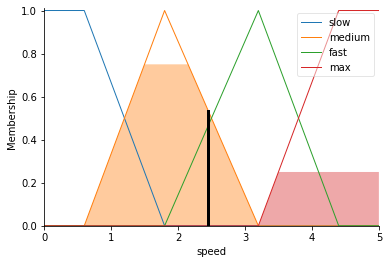

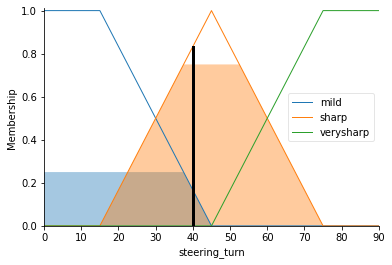

In [14]:
# Create control system with all rules
robot_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

# Simulate the control system
robot_out = ctrl.ControlSystemSimulation(robot_ctrl)

# Create inputs 
dist = 6 # distnace from obstacle
ang = 50 # angle with obstacle
robot_out.input['distance'] = abs(dist)
robot_out.input['angle'] = abs(ang)

print ("Distance from obstacle is: %.2f " % dist)
print ("Angle with obstacle is: %.2f "% ang)

# Compute the outputs 
robot_out.compute()
print ("The output speed is: %.2f " % robot_out.output['speed'])
speed.view(sim=robot_out)
print ("The output steering turn angle is: %.2f" % robot_out.output['steering_turn'])
steering_turn.view(sim=robot_out)